In [26]:
# 線形回帰の参考資料
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('/home/yoshida/.pyenv/versions/3.6.6/lib/python3.6/site-packages')
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [27]:
boston_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
#「sep = \s+」は、もとのデータの区切りがスペースであり、スペースが複数個続いていることを示している

boston_df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PIRATIO','B','LSTAT','MEDV']
#カラムの名前を指定

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [28]:
boston_df.describe() # 統計量

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/home/yoshida/.pyenv/versions/3.6.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


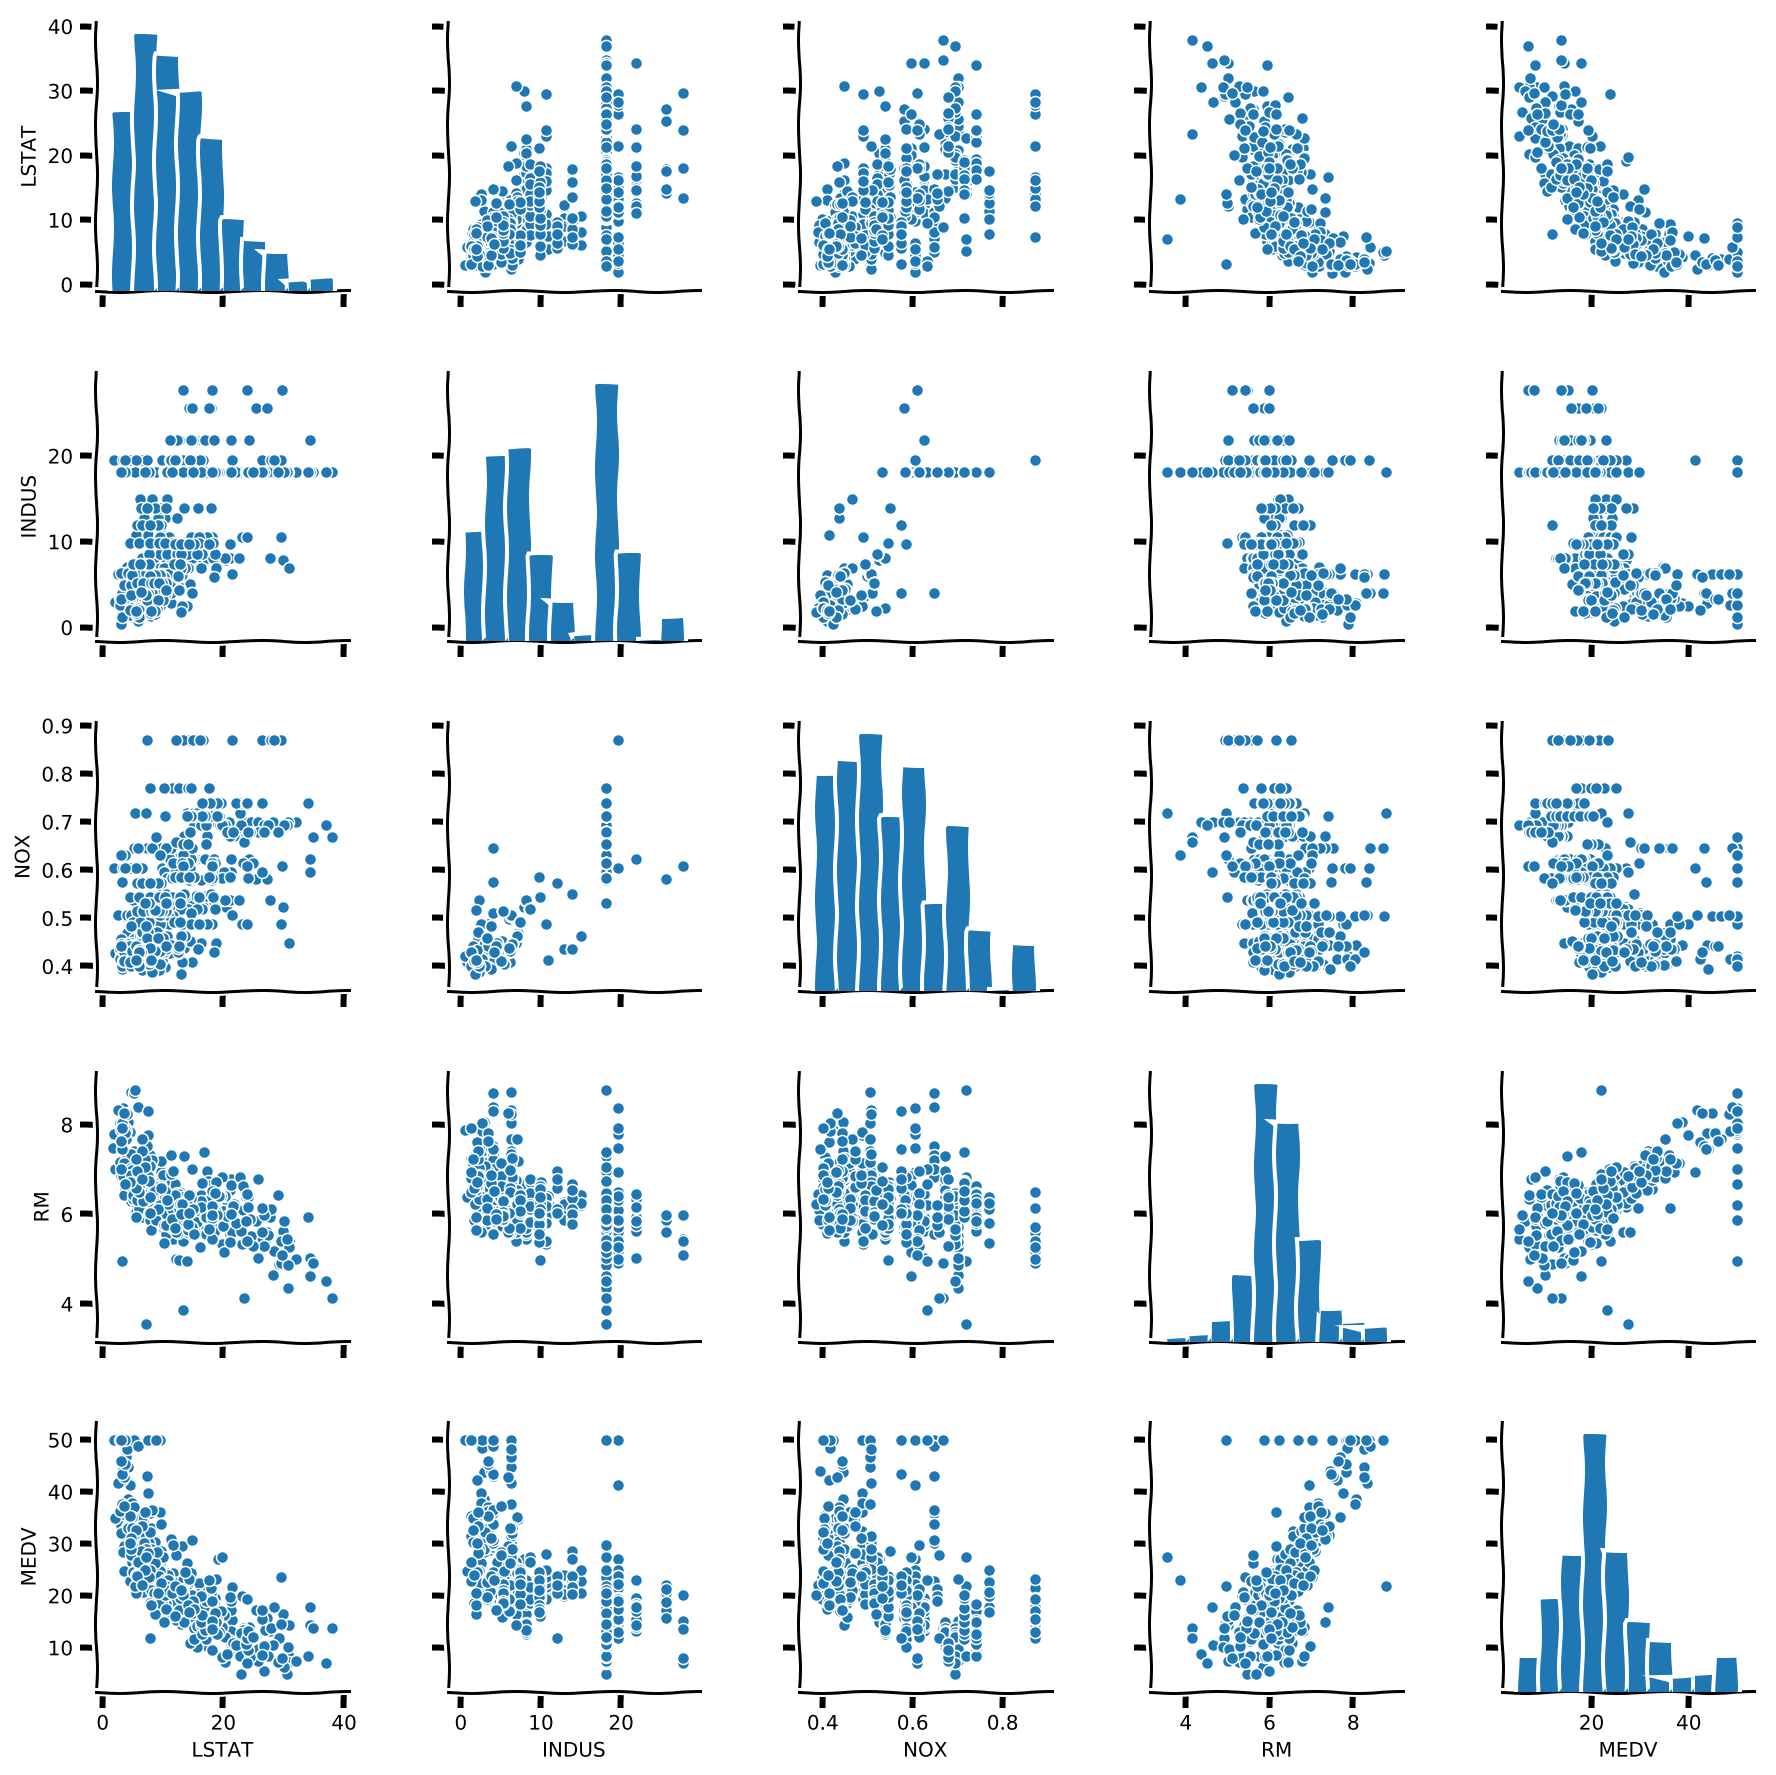

In [29]:
# データセットの可視化
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
# 変数のペアの関係をプロット：dfはDataFrameオブジェクト、sizeは1面のインチサイズ
sns.pairplot(boston_df[cols], size=2.5)
plt.tight_layout()
plt.show()

In [30]:
# LinearRegressionGD回帰の実際の動作を確認するために、HousingデータセットのMEDV(住宅価格の中央値)を予測するモデルをトレーニングする
# 今回は、説明変数としてRM(1戸あたりの平均部屋数)を使用する
X = boston_df[['RM']].values # 部屋数データの読み込み
y = boston_df[['MEDV']].values # 住宅価格の中央値データの読み込み

# モデル作成
from sklearn import linear_model
clf = linear_model.LinearRegression() # 線形回帰

# RMとPRICEの全データで学習
clf.fit(X, y)

# 学習で求められた回帰式(ax+b)の切片と係数を確認
a = clf.coef_ # 係数
b = clf.intercept_ # 切片
print('coefficient a = ', a) 
print('intercept b = ', b)

coefficient a =  [[9.10210898]]
intercept b =  [-34.67062078]


Text(0.5, 1.0, 'Boston house-prices')

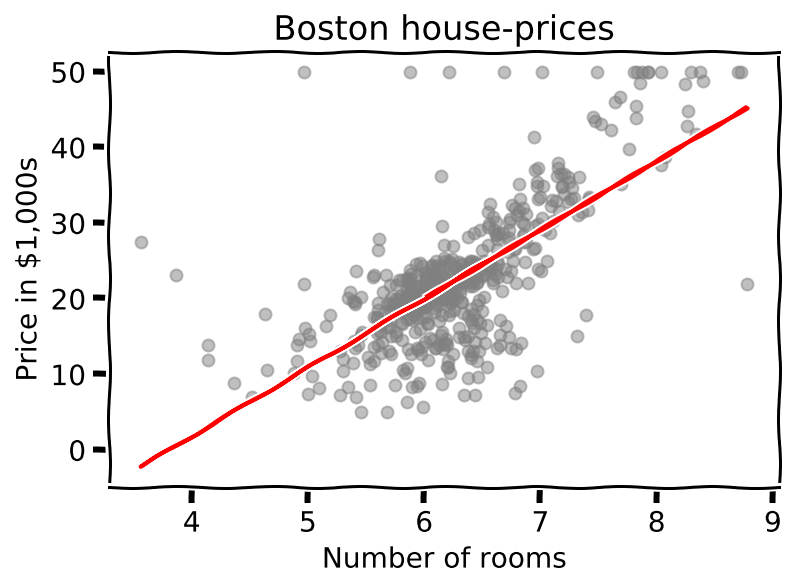

In [31]:
# 回帰式をグラフで可視化
plt.xkcd() # 手書き風
plt.scatter(X, y, c='gray', alpha=0.5) # データプロット

lreg_y = a * X + b # clf.predict(X_RM)の出力値と同じ
plt.plot(X, lreg_y, 'r') # 回帰直線プロット

plt.ylabel('Price in $1,000s')
plt.xlabel('Number of rooms')
plt.title('Boston house-prices')